#  Ejemplo Inferencia sobre datos normales

## Simulaciones

In [ ]:
# Simular normal 0,1
sampleSize <- 100;
data.obs <- rnorm(sampleSize, mean=0, sd=1);

In [ ]:
# Función para calcular y guardar los estadísticos de resumen
calc.stats <- function (x){
S <- c(mean(x), var(x), median(x), range(x), max(x)-min(x),
quantile(x, probs=c(0.25, 0.75)));
names(S) <- c("mean", "var", "median", "min", "max", "range", "Q1", "Q3")
return(S);
}

In [ ]:
# Calcula los estadísticos de resúmen para la data simulada
S.obs <- calc.stats(data.obs);

In [ ]:
# Simulaciones
set.seed(1)
nsim <- 10000;

#Simular los mu y sigma desde la distribución uniforme
P.normal <- data.frame(mu=runif(nsim, min=-1, max=1), sigma2=runif(nsim, min=0.1 , max=4));

# Calcular los estadísticos de resumen a simulaciones con mu y sigma dados en la línea anterior
S.normal <- data.frame(matrix(data=0, ncol=length(S.obs), nrow=nsim));
names(S.normal) <- names(S.obs);
for ( i in 1:nsim ) {
  y <- rnorm(sampleSize, mean = P.normal$mu[i], sd=sqrt(P.normal$sigma2[i]));
  S.normal[i,] <- calc.stats(y);
}


## Inferencia de parámetros

### Algoritmo de rechazo


In [ ]:
 install.packages("abc")
 library(abc);

In [ ]:
rejection <- abc(S.obs,P.normal,S.normal,tol=0.1,method="rejection");

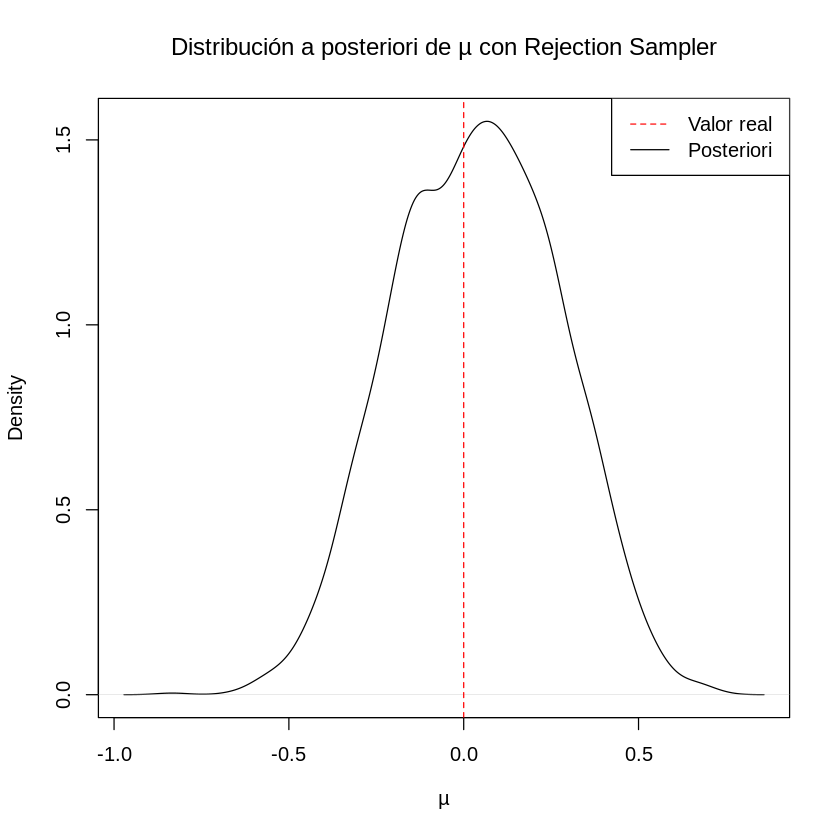

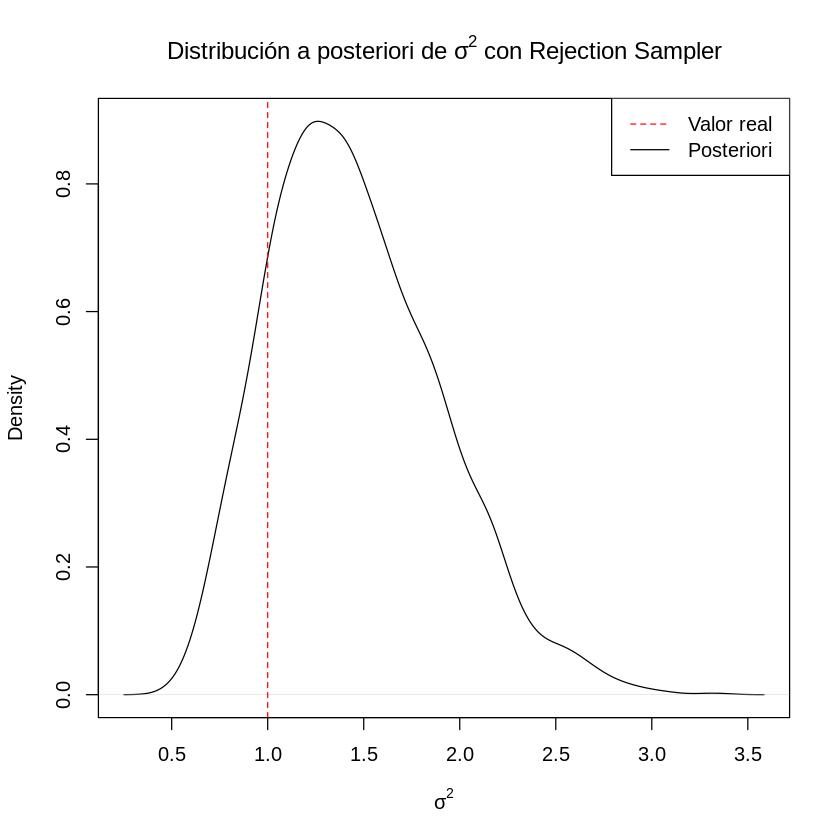

In [ ]:
#Graficar la densidad de mu
den = density(rejection$unadj.values[,1])
plot(den, main=expression(paste("Distribución a posteriori de ", mu, " con Rejection Sampler")),xlab=expression(mu))
abline(v=0, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

#Graficar la densidad de sigma
den = density(rejection$unadj.values[,2])
plot(den, main=expression(paste("Distribución a posteriori de ", sigma^2, " con Rejection Sampler")),xlab=expression(sigma^2))
abline(v=1, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

## Ridge

In [ ]:
ridge <- abc(S.obs,P.normal,S.normal,tol=0.1,method="ridge");

Warning message:
“All parameters are "none" transformed.”


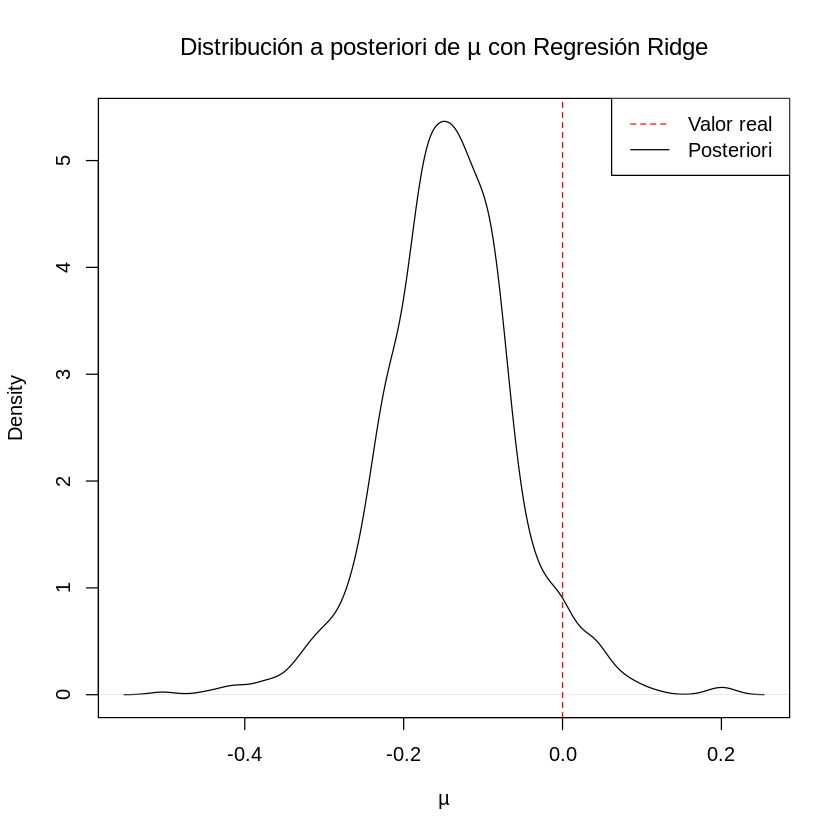

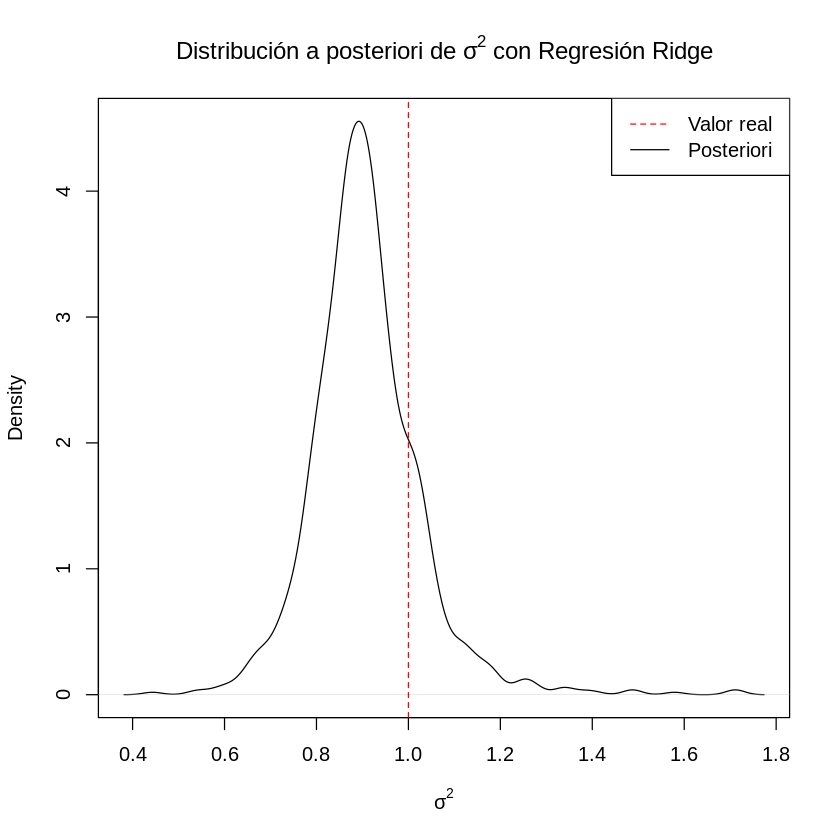

In [ ]:
#Graficar la densidad de mu
den = density(ridge$adj.values[,1])
plot(den, main=expression(paste("Distribución a posteriori de ", mu, " con Regresión Ridge")),xlab=expression(mu))
abline(v=0, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

#Graficar la densidad de sigma
den = density(ridge$adj.values[,2])
plot(den, main=expression(paste("Distribución a posteriori de ", sigma^2, " con Regresión Ridge")),xlab=expression(sigma^2))
abline(v=1, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

## Neural Net

In [ ]:
neural.net <- abc(S.obs,P.normal,S.normal,tol=0.1,method="neuralnet");

Warning message:
“All parameters are "none" transformed.”


12345678910
12345678910


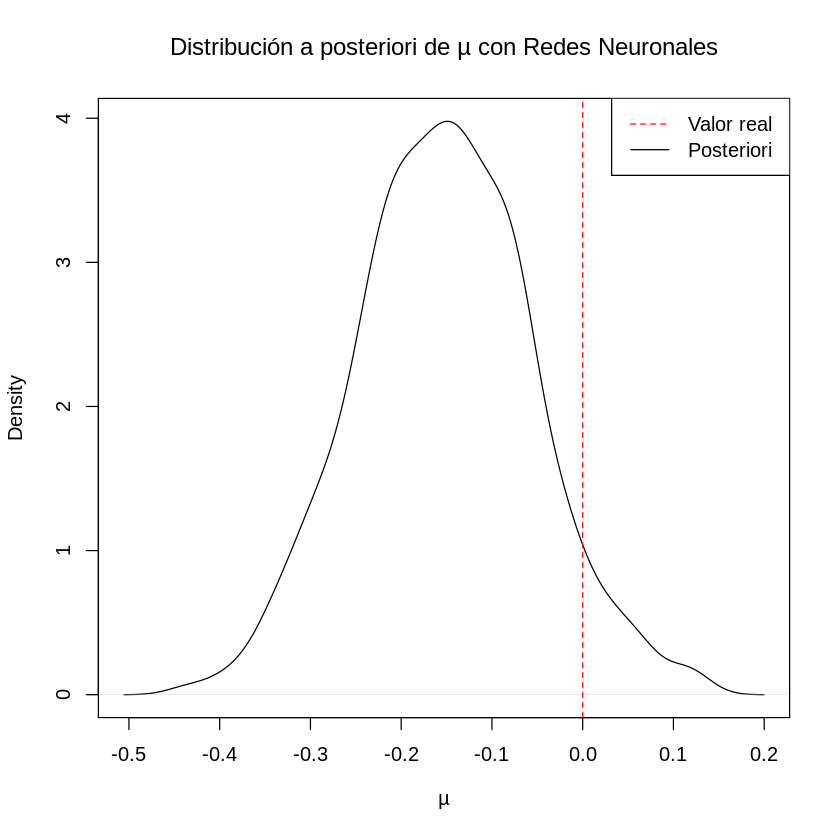

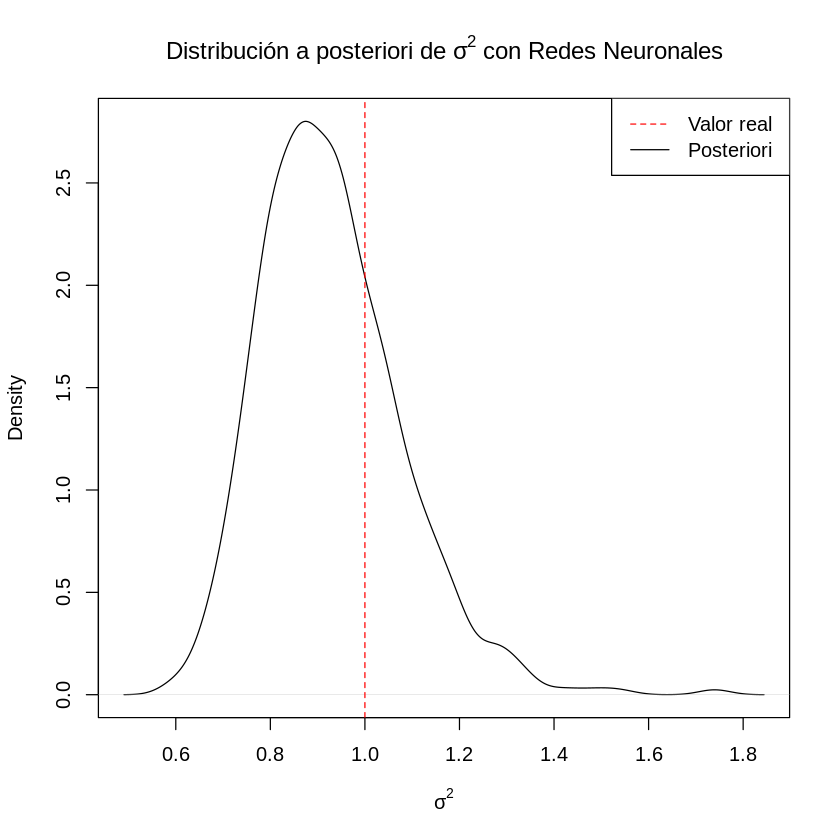

In [ ]:
#Graficar la densidad de mu
den = density(neural.net$adj.values[,1])
plot(den, main=expression(paste("Distribución a posteriori de ", mu, " con Redes Neuronales")),xlab=expression(mu))
abline(v=0, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

#Graficar la densidad de sigma
den = density(neural.net$adj.values[,2])
plot(den, main=expression(paste("Distribución a posteriori de ", sigma^2, " con Redes Neuronales")),xlab=expression(sigma^2))
abline(v=1, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

## MCMC

In [ ]:
install.packages("EasyABC")
library(EasyABC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘pls’, ‘mnormt’, ‘lhs’, ‘tensorA’




In [ ]:
model <- function(x){
data <- rnorm(100, x[1], sqrt(x[2]));
return(calc.stats(data));
}

prior <- list(c("unif",-1,1),c("unif",0.1,4));

#run ABC-MCMC
ABC_posterior <- ABC_mcmc(method="Marjoram", model=model, prior=prior, n_rec=10000, summary_stat_target=S.obs, n_calibration=10000, tolerance_quantile=0.1);

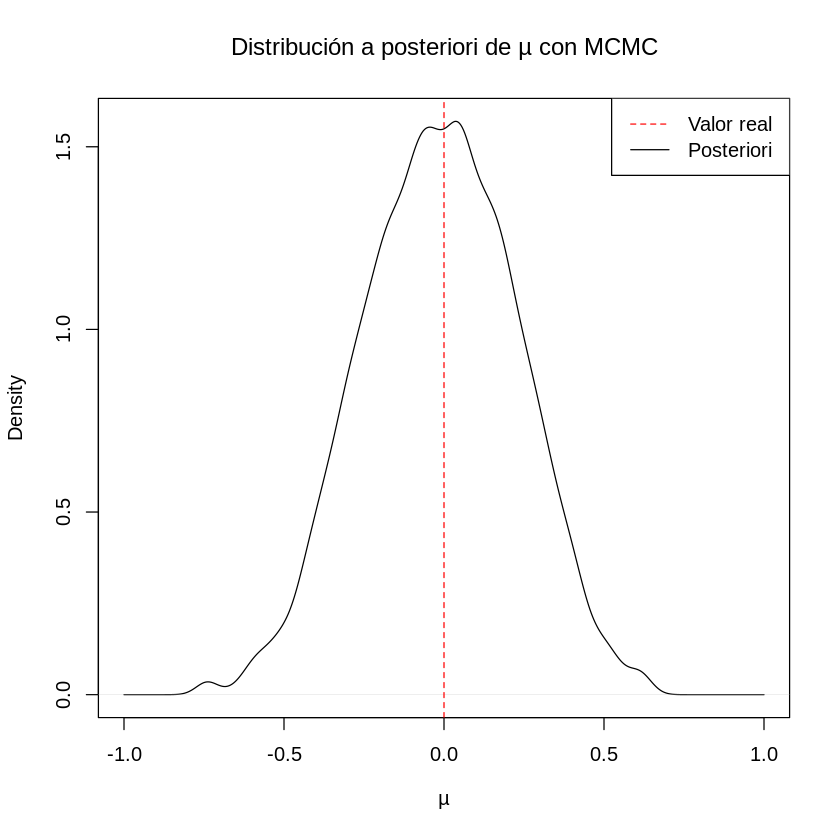

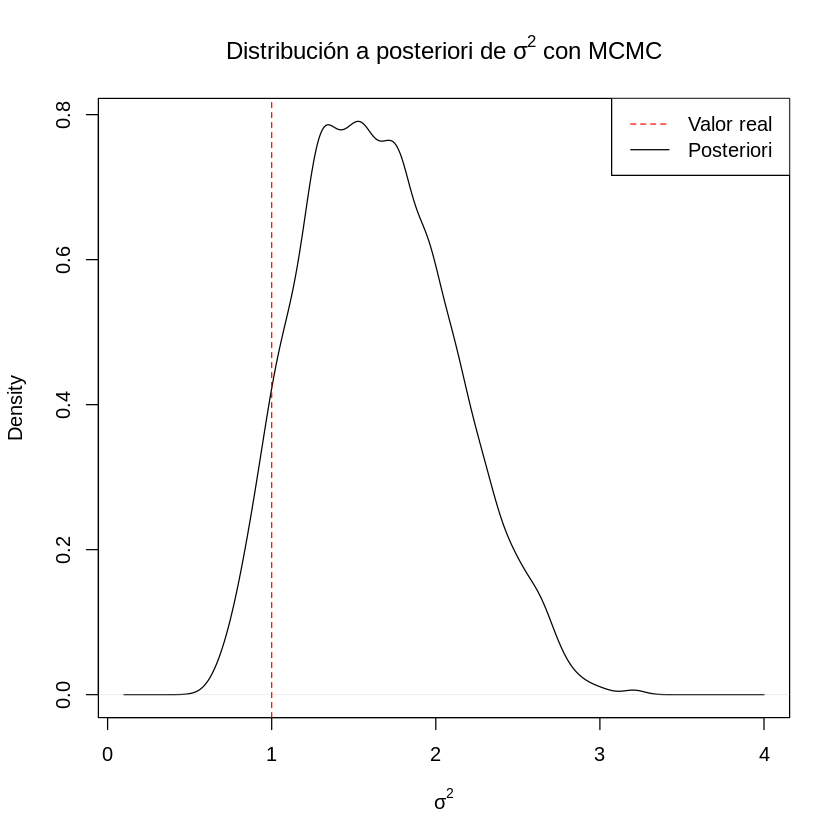

In [ ]:
# Graficar la densidad de mu
plot(density(ABC_posterior$param[,1],from=-1,to=1),xlab=expression(mu),main=expression(paste("Distribución a posteriori de ", mu, " con MCMC")));
abline(v=0, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

# Graficar la densidad de sigma
plot(density(ABC_posterior$param[,2],from=0.1,to=4),main=expression(paste("Distribución a posteriori de ", sigma^2, " con MCMC")),xlab=expression(sigma^2));
abline(v=1, col="red", lty=2)
legend("topright", legend = c("Valor real","Posteriori"), col=c("red","black"), lty=c(2,1))

## Comparación Tiempos

In [ ]:
tamano_muestra = c(100,500,1000,1500)
tamano_sim =c(5000,10000,15000,20000)

### MCMC


In [ ]:
tiempos=c()
for (i in tamano_muestra){

    # Simular normal 0,1
    sampleSize <- i;
    data.obs <- rnorm(sampleSize, mean=0, sd=1);

    # Calcula los estadísticos de resúmen para la data simulada
    S.obs <- calc.stats(data.obs);

    toy_model <- function(x){
    data <- rnorm(sampleSize, x[1], sqrt(x[2]));
    return(calc.stats(data));
    }
    toy_prior <- list(c("unif",-1,1),c("unif",0.1,4));
    #run ABC-MCMC
    t <- Sys.time()
    ABC_posterior <- ABC_mcmc(method="Marjoram", model=toy_model, prior=toy_prior, n_between_sampling=1,n_rec=0.1*10000, summary_stat_target=S.obs, n_calibration=10000, tolerance_quantile=0.1);
    time=Sys.time()-t

    tiempos=c(tiempos,time)


}

In [ ]:
t_mcmc =tiempos
t_mcmc


[1] 3.703476 5.276158 5.490877 6.954311

### Regresiones

In [ ]:
 install.packages("abc")
 library(abc);

In [ ]:
# Función para calcular y guardar los estadísticos de resúmen
calc.stats <- function (x){
S <- c(mean(x), var(x), median(x), range(x), max(x)-min(x),
quantile(x, probs=c(0.25, 0.75)));
names(S) <- c("mean", "var", "median", "min", "max", "range", "Q1", "Q3")
return(S);
}

In [ ]:

tiempos=c()


for (i in tamano_muestra){
    # Simular normal 0,1
    sampleSize <- i;
    data.obs <- rnorm(sampleSize, mean=0, sd=1);

    # Calcula los estadísticos de resúmen para la data simulada
    S.obs <- calc.stats(data.obs);

    t <- Sys.time()

    set.seed(1)
    nsim <- 10000;
    P.normal <- data.frame(mu=runif(nsim, min=-1, max=1), sigma2=runif(nsim, min=0.1 , max=4));
    S.normal <- data.frame(matrix(data=0, ncol=length(S.obs), nrow=nsim));
    names(S.normal) <- names(S.obs);
    for ( i in 1:nsim ) {
      y <- rnorm(sampleSize, mean = P.normal$mu[i], sd=sqrt(P.normal$sigma2[i]));
      S.normal[i,] <- calc.stats(y);
    }


    rejection <- abc(S.obs,P.normal,S.normal,tol=0.1,method="neuralnet");
    time=Sys.time()-t

    tiempos=c(tiempos,time)
}

Warning message:
“All parameters are "none" transformed.”


12345678910
12345678910


Warning message:
“All parameters are "none" transformed.”


12345678910
12345678910


Warning message:
“All parameters are "none" transformed.”


12345678910
12345678910


Warning message:
“All parameters are "none" transformed.”


12345678910
12345678910


In [ ]:
t_neuralnet=tiempos

In [ ]:
t_rejection
t_ridge
t_neuralnet
t_mcmc

[1]  7.404870  8.193758  9.489828 10.042655

[1]  7.980473  8.253814  9.187996 10.247455

[1] 10.39828 11.09688 12.81778 12.79251

[1] 3.703476 5.276158 5.490877 6.954311

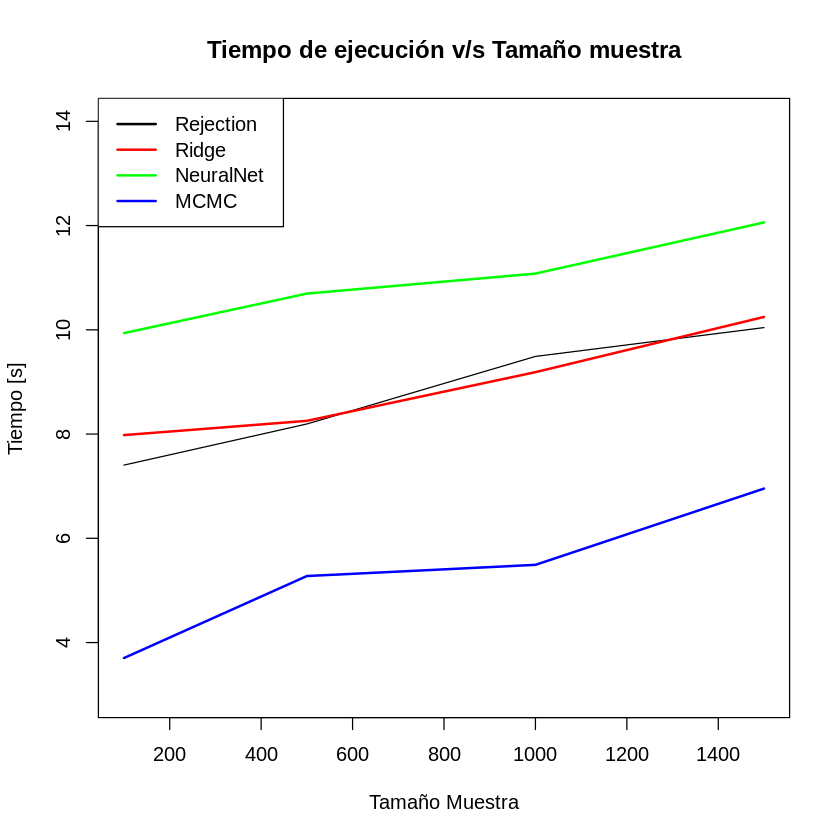

In [ ]:
# Grafico de tiempos
plot(tamano_muestra,t_rejection, type="l",
     main= "Tiempo de ejecución v/s Tamaño muestra",
     xlab="Tamaño Muestra", ylab="Tiempo [s]",ylim=c(3,14))
lines(tamano_muestra,t_ridge,col="red",lwd=2)
lines(tamano_muestra,t_neuralnet,col="green",lwd=2)
lines(tamano_muestra,t_mcmc,col="blue",lwd=2)
legend("topleft", legend = c("Rejection", "Ridge","NeuralNet", "MCMC"), col = c("black", "red","green","blue"), lwd = c(2, 2, 2, 2))


In [ ]:
t_s_rejection
t_s_ridge
t_s_neuralnet
t_s_mcmc

[1]  3.681459  6.256972 11.800437 19.519437

[1]  3.368272  6.911391 13.816334 22.748977

[1]  3.746698  9.380329 15.821804 24.826718

[1] 3.522872 3.790210 4.607019 4.060704

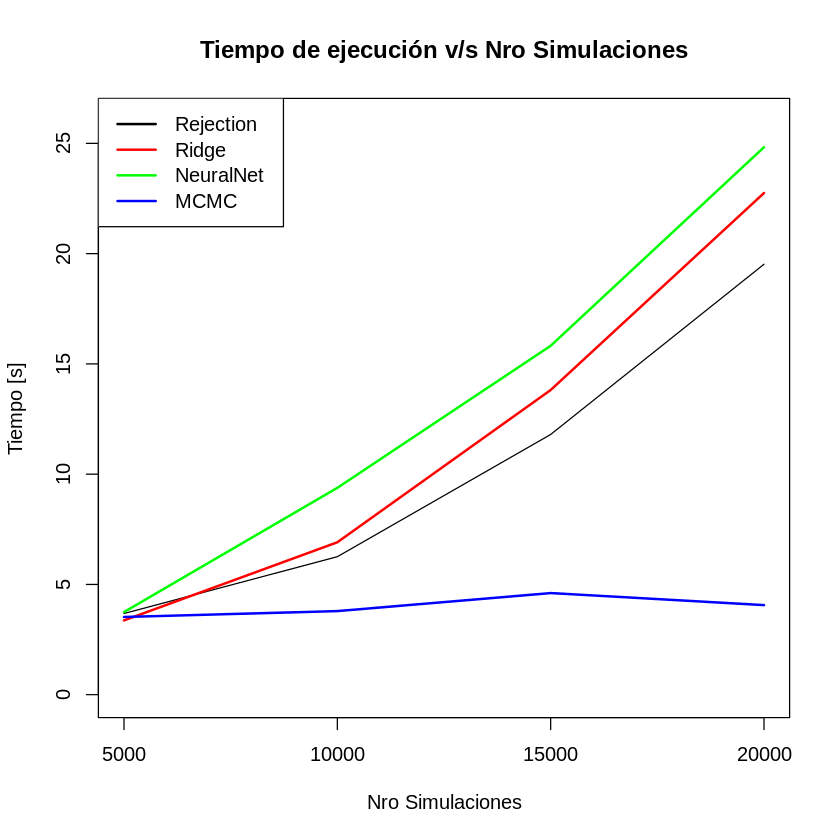

In [ ]:
# Grafico de tiempos
plot(tamano_sim,t_s_rejection, type="l",
     main= "Tiempo de ejecución v/s Nro Simulaciones",
     xlab="Nro Simulaciones", ylab="Tiempo [s]",ylim=c(0,26))
lines(tamano_sim,t_s_ridge,col="red",lwd=2)
lines(tamano_sim,t_s_neuralnet,col="green",lwd=2)
lines(tamano_sim,t_s_mcmc,col="blue",lwd=2)
legend("topleft", legend = c("Rejection", "Ridge","NeuralNet", "MCMC"), col = c("black", "red","green","blue"), lwd = c(2, 2, 2, 2))